In [13]:
import sys
import sklearn

import numpy as np
import os


In [14]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [15]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [16]:
x, y = mnist['data'], mnist['target']

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X10D = pca.fit_transform(x)

In [18]:
X10D.shape

(70000, 10)

In [19]:
X10D

array([[ 122.25523996, -316.23397074,  -51.13201004, ...,  188.88259293,
        -358.84217116,  204.31537933],
       [1010.49401518, -289.96382146,  576.1205548 , ..., -102.17835546,
          34.98618882,  151.9250876 ],
       [ -58.99592221,  393.69700093, -161.9983941 , ...,  374.38886575,
         -78.559649  , -191.92399341],
       ...,
       [-271.50699071,  590.07840557,  341.36850227, ..., -344.88574554,
         -52.38628197, -804.50126294],
       [-310.22475019, -116.72823892,  635.71887424, ...,  144.92655754,
         285.12973182, -204.75269037],
       [1058.86211663,  -83.39230961,  731.34227234, ..., -421.53263276,
         141.19695439,   66.41631182]])

In [20]:
# Columnas que quedan
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278261, 0.02889641, 0.02758364, 0.02342114])

In [21]:
# Nos quedamos con los que pasan por el 95%

pca = PCA()
pca.fit(x)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [22]:
# Busca las columnas para que se conserve el 90% de la infomación
pca = PCA(n_components=0.9)
X_reduced = pca.fit_transform(x)

In [23]:
# Se encarga de la reducción de los componentes al 95%
X_reduced

array([[ 122.25525533, -316.23384391,  -51.13183087, ...,  -29.96433908,
         -20.79139656, -148.41713569],
       [1010.49400346, -289.96362059,  576.1207452 , ...,  -23.5704463 ,
         -59.86507435,  -14.45781913],
       [ -58.99594719,  393.69744499, -161.99818411, ...,   45.28289894,
           3.16775775,   24.79679946],
       ...,
       [-271.50701323,  590.07850009,  341.36886918, ...,  -52.6467221 ,
        -123.77494705,  -34.66001541],
       [-310.22482291, -116.72715081,  635.71999693, ...,  -64.37357649,
           8.57271448,   12.12494644],
       [1058.86212574,  -83.39253843,  731.34218396, ...,   -5.98113171,
         -12.05144845,  -45.96608205]])

In [24]:
# Aquí se ve el 90%
np.sum(pca.explained_variance_ratio_)

0.9005229738568302

In [25]:
X_reduced.shape

(70000, 87)

Nos sirve para saber cuantas columnas pillar por que afecta más o menos

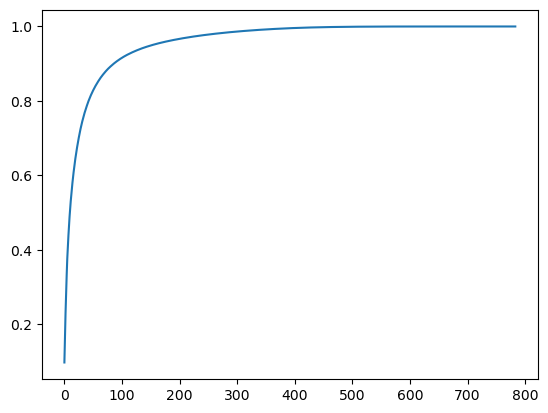

In [26]:
import matplotlib.pyplot as plt

plt.plot(cumsum)